### Author: Muhammad Ali Abbasi

## DataSet Link: http://archive.ics.uci.edu/ml/machine-learning-databases/iris
## Importing Libraries and downloading dataSet

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report,confusion_matrix

In [12]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                names=["Sepal_Length","Sepal_Width","Petal_Length","Petal_Width","Species_Flower"])
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species_Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sepal_Length    150 non-null    float64
 1   Sepal_Width     150 non-null    float64
 2   Petal_Length    150 non-null    float64
 3   Petal_Width     150 non-null    float64
 4   Species_Flower  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
df.head(11)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species_Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [15]:
df.shape

(150, 5)

In [16]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Visualization

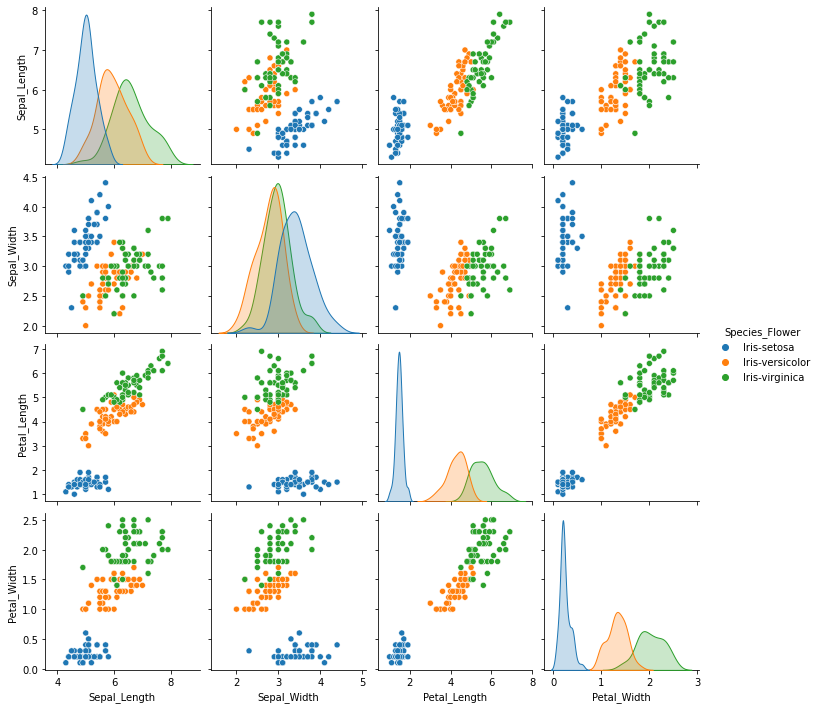

In [17]:
sns.pairplot(df,hue="Species_Flower")

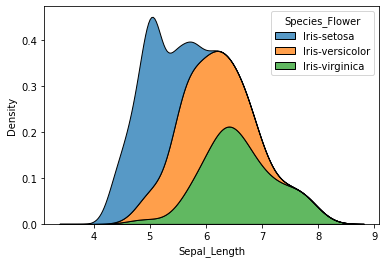

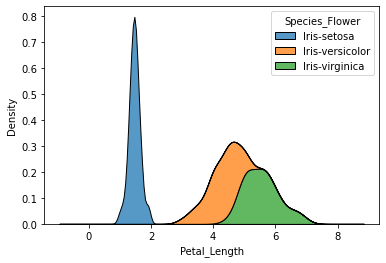

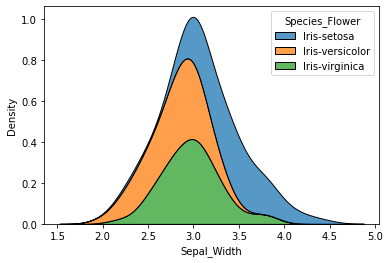

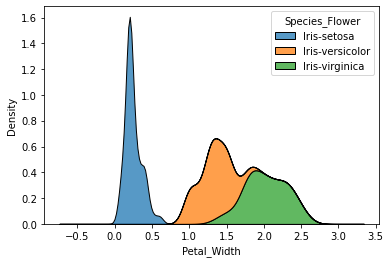

In [18]:
sns.kdeplot(data=df, x="Sepal_Length", hue="Species_Flower", multiple="stack")
plt.show()
sns.kdeplot(data=df, x="Petal_Length", hue="Species_Flower", multiple="stack")
plt.show()
sns.kdeplot(data=df, x="Sepal_Width", hue="Species_Flower", multiple="stack")
plt.show()
sns.kdeplot(data=df, x="Petal_Width", hue="Species_Flower", multiple="stack")
plt.show()

<AxesSubplot:xlabel='Sepal_Width', ylabel='Petal_Width'>

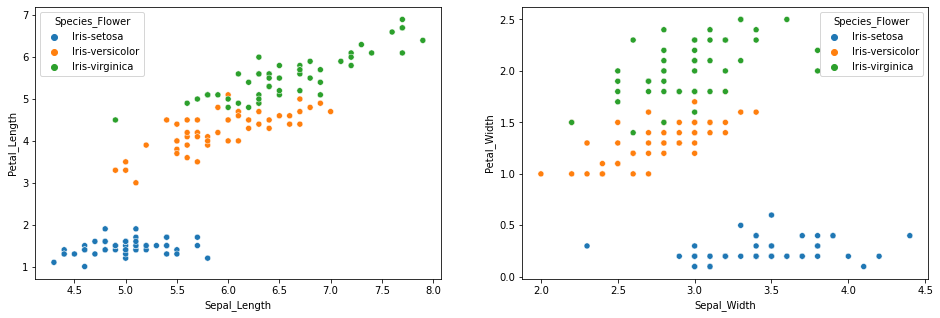

In [19]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='Sepal_Length',y='Petal_Length',data=df,hue='Species_Flower',ax=ax1)
sns.scatterplot(x='Sepal_Width',y='Petal_Width',data=df,hue='Species_Flower',ax=ax2)

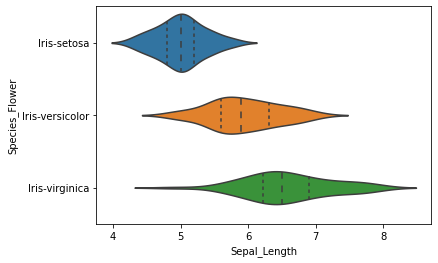

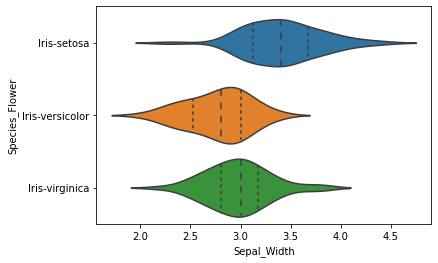

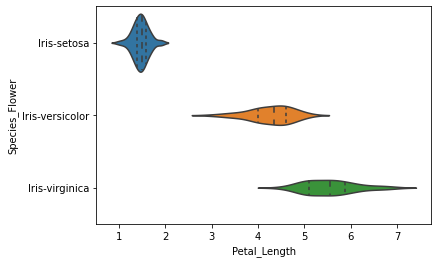

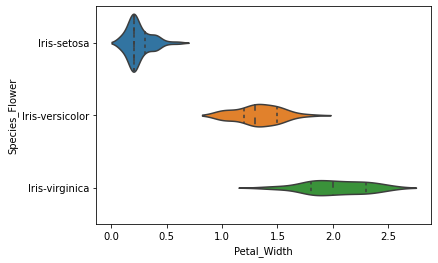

In [20]:
sns.violinplot(y='Species_Flower', x='Sepal_Length', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Species_Flower', x='Sepal_Width', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Species_Flower', x='Petal_Length', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Species_Flower', x='Petal_Width', data=df, inner='quartile')
plt.show()

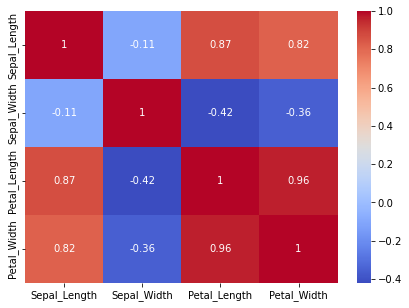

In [21]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')
plt.show()

### Building, Training and Testing Model

In [22]:
X = df.drop(columns=['Species_Flower'])
Y = df['Species_Flower']
X = X.apply(pd.to_numeric, errors='coerce')
Y = Y.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3)

###### 1) Linear Regression

In [25]:
model_1=LinearRegression()

In [26]:
model_1.fit(x_train, y_train)

LinearRegression()

In [27]:
y_pred=model_1.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [28]:
def report(model):
    preds=model.predict(x_test)
    print(classification_report(preds,y_test))

In [29]:
print('Linear Regression')
report(model_1)
print(f'Accuracy: {round(score*100,2)}%')

Linear Regression
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        45

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 100.0%


###### 2) Linear SVC

In [30]:
X = df.drop(columns=['Species_Flower'])
Y = df['Species_Flower']
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3)

In [31]:
l_svc=LinearSVC()

In [32]:
l_svc.fit(x_train,y_train)

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [33]:
y_pred=l_svc.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [34]:
def report(model):
    preds=model.predict(x_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,x_test,y_test)

Linear SVC
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.95      1.00      0.97        18

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 97.78%


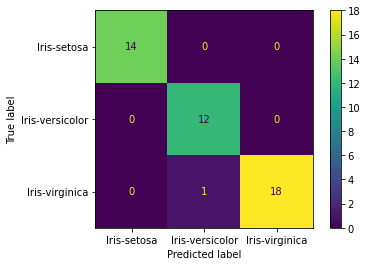

In [35]:
print('Linear SVC')
report(l_svc)
print(f'Accuracy: {round(score*100,2)}%')

###### 3) Multinomial Naive Bayes

In [36]:
MNB=MultinomialNB()

In [37]:
MNB.fit(x_train,y_train)

MultinomialNB()

In [38]:
y_pred=MNB.predict(x_test)
score=accuracy_score(y_test,y_pred)

Multinomial NB
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.40      0.57        30
 Iris-virginica       0.05      1.00      0.10         1

       accuracy                           0.60        45
      macro avg       0.68      0.80      0.56        45
   weighted avg       0.98      0.60      0.69        45

 Accuracy: 60.0%


D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


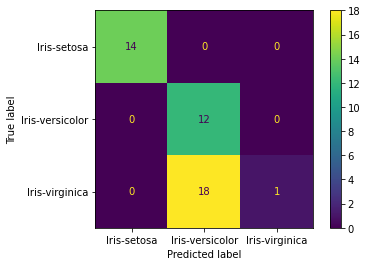

In [39]:
print('Multinomial NB')
report(MNB)
print(f' Accuracy: {round(score*100,2)}%')

###### 4) Decision Tree Classifier

In [40]:
DTC =DecisionTreeClassifier()

In [41]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [42]:
y_pred=DTC.predict(x_test)
score=accuracy_score(y_test,y_pred)

Decision Tree Classifier
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        19

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


 Accuracy: 100.0%


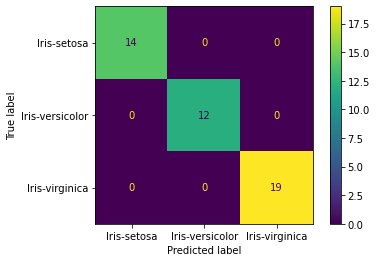

In [43]:
print("Decision Tree Classifier")
report(DTC)
print(f' Accuracy: {round(score*100,2)}%')

##### 5) KNN

In [44]:
KNN=KNeighborsClassifier()

In [45]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [46]:
y_pred=KNN.predict(x_test)
score=accuracy_score(y_test,y_pred)

KNN
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        19

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


 Accuracy: 100.0%


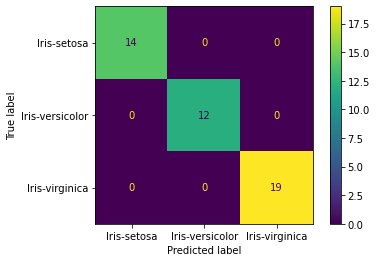

In [47]:
print("KNN")
report(KNN)
print(f' Accuracy: {round(score*100,2)}%')